In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('MI.csv')

In [21]:
#clean data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df)

data = pd.DataFrame(imputer.transform(df), columns= df.columns)

    ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0  1.0  77.0  1.0       2.0        1.0        1.0       2.0     0.375  3.0   
1  2.0  55.0  1.0       1.0        0.0        0.0       0.0     0.000  0.0   
2  3.0  52.0  1.0       0.0        0.0        0.0       2.0     0.375  2.0   
3  4.0  68.0  0.0       0.0        0.0        0.0       2.0     0.375  2.0   
4  5.0  60.0  1.0       0.0        0.0        0.0       2.0     0.375  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...        0.0         0.0       0.0        0.0     0.0   
1         0.0  ...        0.0         0.0       0.0        0.0     0.0   
2         0.0  ...        0.0         0.0       0.0        0.0     0.0   
3         0.0  ...        0.0         0.0       0.0        0.0     0.0   
4         0.0  ...        0.0         0.0       0.0        0.0     0.0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0       0.0  0.0     0.0        0.0     

In [26]:
from sklearn.neighbors import KNeighborsClassifier
labels = data.loc[:, 'FIBR_PREDS':'LET_IS']
co_death = data['LET_IS']
feats = data.loc[:, 'AGE':'TRENT_S_n']
feats.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1.0,2.0,1.0,1.0,2.0,0.375,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1.0,0.0,0.0,0.0,2.0,0.375,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0.0,0.0,0.0,0.0,2.0,0.375,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,2.0,0.375,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


FIBR_PREDS  accuracy: 0.9088235294117647
PREDS_TAH  accuracy: 0.9911764705882353
JELUD_TAH  accuracy: 0.9735294117647059
FIBR_JELUD  accuracy: 0.95
A_V_BLOK  accuracy: 0.9647058823529412
OTEK_LANC  accuracy: 0.9176470588235294
RAZRIV  accuracy: 0.9764705882352941
DRESSLER  accuracy: 0.9647058823529412
ZSN  accuracy: 0.7235294117647059
REC_IM  accuracy: 0.8970588235294118
P_IM_STEN  accuracy: 0.8941176470588236
LET_IS  accuracy: 0.8647058823529412


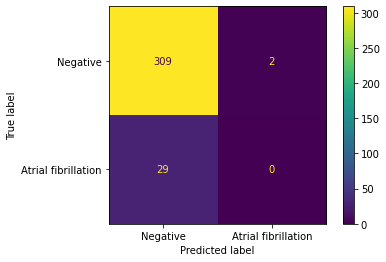

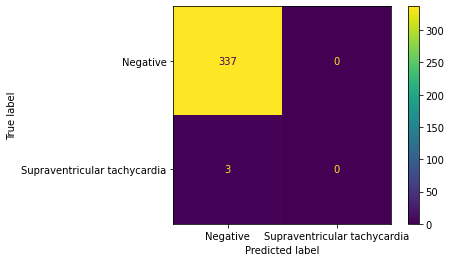

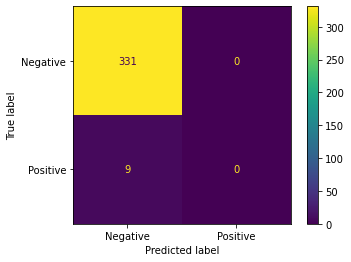

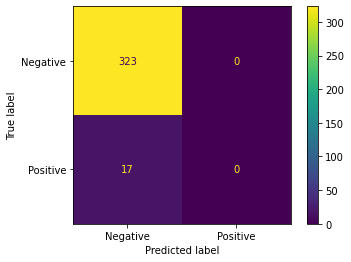

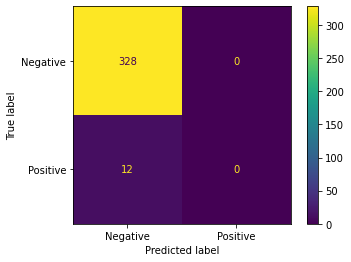

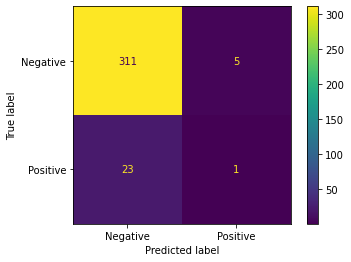

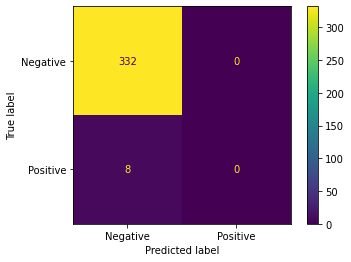

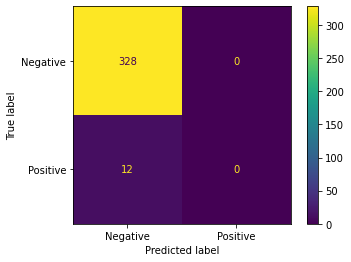

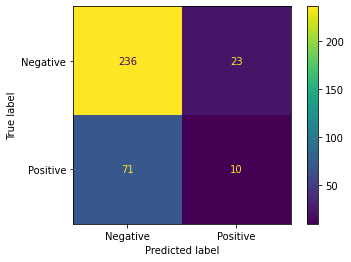

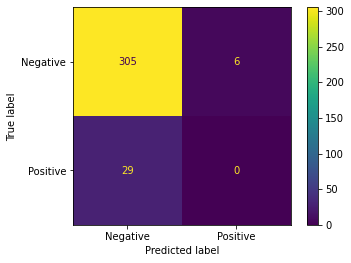

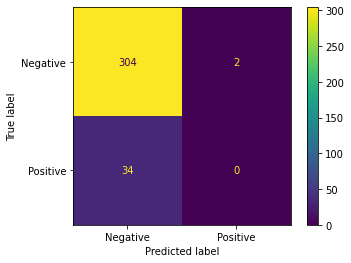

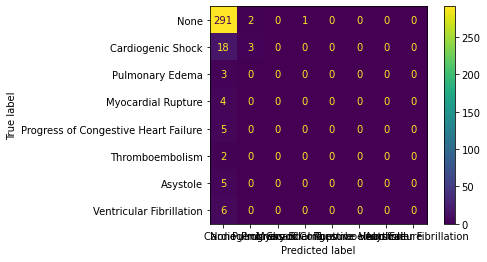

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

np.random.seed(20221102)

clf = KNeighborsClassifier()
disp_labels = {'FIBR_PREDS':['Negative','Atrial fibrillation'], 'PREDS_TAH':['Negative', 'Supraventricular tachycardia'], 
              'JELUD_TAH':['Negative', 'Positive'], 'FIBR_JELUD':['Negative', 'Positive'],
              'A_V_BLOK':['Negative', 'Positive'], 'OTEK_LANC':['Negative', 'Positive'], 'RAZRIV':['Negative', 'Positive'],
              'DRESSLER':['Negative', 'Positive'], 'ZSN':['Negative', 'Positive'], 'REC_IM':['Negative', 'Positive'],
              'P_IM_STEN':['Negative', 'Positive'], 'LET_IS':['None', 'Cardiogenic Shock', 'Pulmonary Edema',
                                                              'Myocardial Rupture', 'Progress of Congestive Heart Failure',
                                                              'Thromboembolism', 'Asystole', 'Ventricular Fibrillation']}

for label in labels:
    train, test, tr_labels, t_labels = train_test_split(feats, data[label], test_size=0.2)
    clf.fit(train, tr_labels)
    print(label, ' accuracy:', accuracy_score(t_labels, clf.predict(test)))
    plot_confusion_matrix(clf, test, t_labels, display_labels = disp_labels.get(label))